In [1]:
f = lambda  x : x ** 2
f(2)

4

In [7]:
# 不会的东西查手册
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('train_images.shape = ', train_images.shape)
print('train_labels = ', train_labels)
print('test_images.shape = ', test_images.shape)
print('test_labels = ', test_labels)

train_images.shape =  (60000, 28, 28)
train_labels =  [5 0 4 ... 5 6 8]
test_images.shape =  (10000, 28, 28)
test_labels =  [7 2 1 ... 4 5 6]


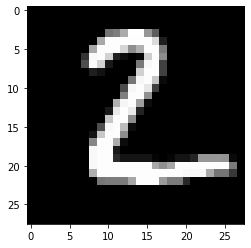

In [8]:
import matplotlib.pyplot as plt
digit = test_images[1]
plt.imshow(digit, cmap = 'gray')
plt.show()




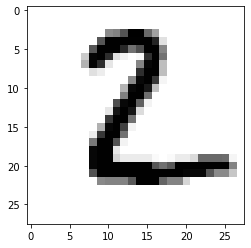

In [9]:
import matplotlib.pyplot as plt
digit = test_images[1]
plt.imshow(digit, plt.get_cmap('gray_r'))
plt.show()

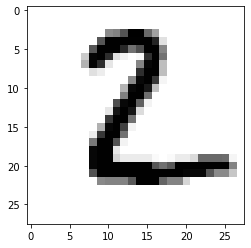

In [11]:
# plt.imshow(image, cmap=plt.get_cmap('gray_r'))
# plt.imshow(image, cmap='gray_r')
# plt.imshow(image, cmap=plt.cm.binary)

import matplotlib.pyplot as plt
digit = test_images[1]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

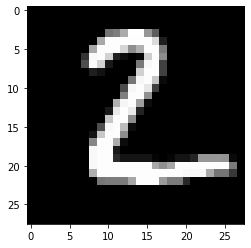

In [12]:
import matplotlib.pyplot as plt
digit = test_images[1]
plt.imshow(digit, cmap = plt.cm.binary_r)
plt.show()


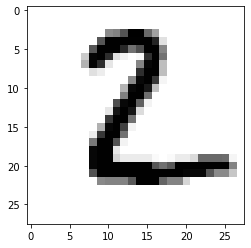

In [13]:
import matplotlib.pyplot as plt
digit = test_images[1]
plt.imshow(digit, cmap = plt.get_cmap('gray_r'))
plt.show()


In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])




In [17]:
# 归一化处理
# 把数据加入模型之前要进行归一化处理，
# 1. reshape(60000, 28 * 28) : train_images数组原来含有60000个
# 元素， 每个元素是一个28行，28列的二维数组，现在把每一个二维数组转成一个含有 28 * 28
# 个元素的一维数组

# 2. 由于数字图像是一个灰度的图像， 图片中的每一个像素值的大小在[0, 255]之间，
# 3. train_images.astype("float") / 255 把每一个像素点的值从范围0-255装变成0-1之间的浮点数

In [19]:
# (60000, 28, 28) ----- > (600000, 28 * 28)
train_images = train_images.reshape(60000,  28 * 28)
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape(10000, 28 * 28)
test_images = test_images.astype('float32') / 255



In [20]:
# 图片的标签做标记，
# 现在每一个图片是0-9的一个数
# 7 -----》 变成（1, 10）的数组--[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [21]:
from tensorflow.keras.utils import to_categorical
print("before change:", test_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("after change", test_labels[0])


before change: 7
after change [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [22]:
[5]
'''
把数据丢进网络进行训练
train_images: 用于训练的手写数字图片
train_labels: 对应的是图片的标记
batch_size: 每次输入的图片数组中随机选择128个作为一组进行计算
epochs: 每次计算的循环次数
'''


'\n把数据丢进网络进行训练\ntrain_images: 用于训练的手写数字图片\ntrain_labels: 对应的是图片的标记\nbatch_size: 每次输入的图片数组中随机选择128个作为一组进行计算\nepochs: 每次计算的循环次数\n'

In [23]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


2021-08-15 12:23:43.813395: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


Epoch 1/5
60000/60000 [==============================] - 1s 22us/sample - loss: 1.4661 - acc: 0.6903

In [24]:
# [6]
# 测试数据输入， 检验网络学习后的图片识别效果
# 识别效果与硬件有关（CPU / GPU）

test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=1)
print(test_loss)
print(test_acc)


10000/10000 [==============================] - 0s 23us/sample - loss: 55.7109 - acc: 0.8082
55.71087650985718
0.8082


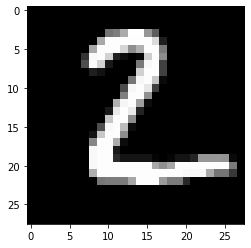

In [27]:
# [7]
# 输入一个手写图片到网络中， 看看它的识别效果
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = test_images[1]
plt.imshow(digit, cmap='gray')
plt.show()

In [28]:
test_images = test_images.reshape((10000, 28 * 28))
res = network.predict(test_images)




In [30]:
for i in range(res[1].shape[0]):
    if (res[1][i] == 1):
        print("the number gor the picture is : ", i)
        break




the number gor the picture is :  2


In [35]:
import numpy as np
# 哪个位置的结果是最大的
np.random.seed(1234)
c = np.random.randint(1, 1000,( 20,))
np.argmax(c)


16

In [36]:
c[16]


893

In [38]:
import scipy.special
label = 2
correct_number = 2
score = []
if label == correct_number:
    score.append(1)
else:
    score.append(0)
score


socre1 = [1,0,0,0,1]
sum(socre1)

2

In [ ]:
# 训练
# epochs 的数值越大， 网络训练越精准， 但是一旦超过一个阈值， 容易过拟合

epochs = 10

for e in range(epochs):
    # 数据的训练



In [40]:
import math
pow(2,3)

8

In [40]:
# 网络的框架的改变，但是训练和推理都一样，不会变化
# 之后学习的要点在网络结构

In [ ]:
# 深度学习开源框架
'''
1. 深度学习框架
2. 主流深度学习框架
3. Tensorflow
4. Pytorch
5. 相关优化算法：BGD、SGD
6. 拓展：Adam、RMSprop
'''

# 使用框架实现相关代码，实现训练的前项传输
'''
框架---库
降低入门的门槛，
'''

'''
深度学习框架—关于组件
大部分深度学习框架都包含以下五个核心组件：
1. 张量（Tensor）
2. 基于张量的各种操作（Operation）
3. 计算图（Computation Graph）
4. 自动微分（Automatic Differentiation）工具
5. BLAS、cuBLAS、cuDNN等拓展包
'''
# 1. 张量---输入--- 广义矩阵

In [ ]:
# 我们也可以用四阶张量表示一个包含多张图片的数据集，其中的四个维度分别
# 是：图片在数据集中的编号，图片高度、宽度，以及色彩数据。N,H,W,C

# 计算图


onnx
pytorch --- > onnx -------> tf
onnx ---- > tf

作业：
1. 从零开始训练
2. keras实现

In [9]:
from tensorflow import keras

import numpy as np

models = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
models.compile(optimizer='sgd', loss = 'mean_squared_error')

# 准备数据
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype = float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype = float)

# 训练模型
models.fit(xs, ys, epochs=500, verbose=1)
#使用模型
print(models.predict([-10.0]))



Epoch 1/500
6/6 [==============================] - 0s 15ms/sample - loss: 4.6629
Epoch 2/500
6/6 [==============================] - 0s 143us/sample - loss: 3.8404
Epoch 3/500
6/6 [==============================] - 0s 127us/sample - loss: 3.1897
Epoch 4/500
6/6 [==============================] - 0s 154us/sample - loss: 2.6743
Epoch 5/500
6/6 [==============================] - 0s 154us/sample - loss: 2.2655
Epoch 6/500
6/6 [==============================] - 0s 170us/sample - loss: 1.9405
Epoch 7/500
6/6 [==============================] - 0s 249us/sample - loss: 1.6816
Epoch 8/500
6/6 [==============================] - 0s 154us/sample - loss: 1.4747
Epoch 9/500
6/6 [==============================] - 0s 147us/sample - loss: 1.3088
Epoch 10/500
6/6 [==============================] - 0s 169us/sample - loss: 1.1752
Epoch 11/500
6/6 [==============================] - 0s 177us/sample - loss: 1.0671
Epoch 12/500
6/6 [==============================] - 0s 223us/sample - loss: 0.9792
Epoch 13/500
6

Epoch 100/500
6/6 [==============================] - 0s 159us/sample - loss: 0.1142
Epoch 101/500
6/6 [==============================] - 0s 198us/sample - loss: 0.1119
Epoch 102/500
6/6 [==============================] - 0s 164us/sample - loss: 0.1096
Epoch 103/500
6/6 [==============================] - 0s 169us/sample - loss: 0.1073
Epoch 104/500
6/6 [==============================] - 0s 172us/sample - loss: 0.1051
Epoch 105/500
6/6 [==============================] - 0s 244us/sample - loss: 0.1030
Epoch 106/500
6/6 [==============================] - 0s 242us/sample - loss: 0.1009
Epoch 107/500
6/6 [==============================] - 0s 179us/sample - loss: 0.0988
Epoch 108/500
6/6 [==============================] - 0s 217us/sample - loss: 0.0968
Epoch 109/500
6/6 [==============================] - 0s 197us/sample - loss: 0.0948
Epoch 110/500
6/6 [==============================] - 0s 175us/sample - loss: 0.0928
Epoch 111/500
6/6 [==============================] - 0s 284us/sample - loss:

Epoch 198/500
6/6 [==============================] - 0s 160us/sample - loss: 0.0149
Epoch 199/500
6/6 [==============================] - 0s 190us/sample - loss: 0.0146
Epoch 200/500
6/6 [==============================] - 0s 212us/sample - loss: 0.0143
Epoch 201/500
6/6 [==============================] - 0s 137us/sample - loss: 0.0140
Epoch 202/500
6/6 [==============================] - 0s 146us/sample - loss: 0.0138
Epoch 203/500
6/6 [==============================] - 0s 154us/sample - loss: 0.0135
Epoch 204/500
6/6 [==============================] - 0s 207us/sample - loss: 0.0132
Epoch 205/500
6/6 [==============================] - 0s 145us/sample - loss: 0.0129
Epoch 206/500
6/6 [==============================] - 0s 145us/sample - loss: 0.0127
Epoch 207/500
6/6 [==============================] - 0s 135us/sample - loss: 0.0124
Epoch 208/500
6/6 [==============================] - 0s 156us/sample - loss: 0.0121
Epoch 209/500
6/6 [==============================] - 0s 314us/sample - loss:

Epoch 296/500
6/6 [==============================] - 0s 343us/sample - loss: 0.0020
Epoch 297/500
6/6 [==============================] - 0s 283us/sample - loss: 0.0019
Epoch 298/500
6/6 [==============================] - 0s 393us/sample - loss: 0.0019
Epoch 299/500
6/6 [==============================] - 0s 501us/sample - loss: 0.0018
Epoch 300/500
6/6 [==============================] - 0s 303us/sample - loss: 0.0018
Epoch 301/500
6/6 [==============================] - 0s 440us/sample - loss: 0.0018
Epoch 302/500
6/6 [==============================] - 0s 322us/sample - loss: 0.0017
Epoch 303/500
6/6 [==============================] - 0s 238us/sample - loss: 0.0017
Epoch 304/500
6/6 [==============================] - 0s 473us/sample - loss: 0.0017
Epoch 305/500
6/6 [==============================] - 0s 468us/sample - loss: 0.0016
Epoch 306/500
6/6 [==============================] - 0s 480us/sample - loss: 0.0016
Epoch 307/500
6/6 [==============================] - 0s 424us/sample - loss:

Epoch 391/500
6/6 [==============================] - 0s 203us/sample - loss: 2.7217e-04
Epoch 392/500
6/6 [==============================] - 0s 179us/sample - loss: 2.6658e-04
Epoch 393/500
6/6 [==============================] - 0s 205us/sample - loss: 2.6111e-04
Epoch 394/500
6/6 [==============================] - 0s 186us/sample - loss: 2.5574e-04
Epoch 395/500
6/6 [==============================] - 0s 174us/sample - loss: 2.5049e-04
Epoch 396/500
6/6 [==============================] - 0s 169us/sample - loss: 2.4534e-04
Epoch 397/500
6/6 [==============================] - 0s 168us/sample - loss: 2.4031e-04
Epoch 398/500
6/6 [==============================] - 0s 132us/sample - loss: 2.3537e-04
Epoch 399/500
6/6 [==============================] - 0s 148us/sample - loss: 2.3053e-04
Epoch 400/500
6/6 [==============================] - 0s 123us/sample - loss: 2.2580e-04
Epoch 401/500
6/6 [==============================] - 0s 144us/sample - loss: 2.2116e-04
Epoch 402/500
6/6 [=============

In [11]:
# keras.Sequential?
print(models.predict([10.0]))

[[18.984468]]


In [1]:
# load fashon dataset MNIST

from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)


(60000, 28, 28)


In [3]:
import numpy as np
print(test_images.shape)
print(test_labels)
np.unique(test_labels)  # 10 

(10000, 28, 28)
[9 2 1 ... 8 1 5]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
print(train_images[0])   # train 是灰度图

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [4]:
print(train_labels[:3])   # 训练图片的前3个标签

[9 0 0]


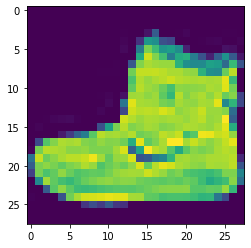

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])   #展示第0张图片

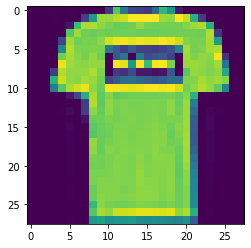

In [21]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1])   #展示第1张图片

In [6]:
# train， test---->验证数据准确度

# 构造神经元模型
# 3 layers--->10 类
import tensorflow as tf
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
keras.layers.Dense?
Init signature:
keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)

Arguments:
  units: Positive integer, dimensionality of the output space.
  activation: Activation function to use.




In [28]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 100480 = 128 * 784
128 * 784

#? 因为每一层都有bias

100352

In [31]:
128 * (784 + 1)

100480

In [32]:
(128 + 1) * 10   # 全连接

1290

In [8]:
# 优化, loss function, metrics
train_images = train_images / 255
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)

2021-08-16 08:13:51.701076: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


Epoch 1/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4981 - acc: 0.8246

[53.17425981219141, 0.8629]

In [35]:
# model.compile(optimizer=tf.optimizer.Adam(),
#              loss=tf.losses.sparse_categorical_crossentropy,
#              metrics=['accuracy'])

test_images = test_images / 255
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.3572 - acc: 0.8717


[0.35715772643089294, 0.8717]

9
9


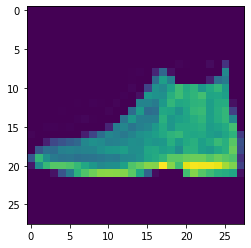

In [51]:
c = model.predict([[test_images[0]]])
print(np.argmax(c))
print(test_labels[0])
plt.imshow(test_images[0])

In [48]:
# 训练太久了， 就会过拟合

9

In [49]:
test_labels[0]

9

In [10]:
# 1. 怎么查看TensorFlow的初始化权重值
tf.trainable_variables()

'''
[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(128, 10) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32>]
'''

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(128, 10) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32>]

In [11]:
variable_name = [v.name for v in tf.trainable_variables()]
variable_name


['dense/kernel:0', 'dense/bias:0', 'dense_1/kernel:0', 'dense_1/bias:0']

In [17]:
# 2、获取权重：tf.get_default_graph().get_tensor_by_name('variable_name')
c = tf.get_default_graph().get_tensor_by_name('dense/kernel:0')
c


<tf.Tensor 'dense/kernel:0' shape=() dtype=resource>

In [18]:
tf.GraphKeys.TRAINABLE_VARIABLES


'trainable_variables'

In [1]:
# 防止过拟合
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('loss') < 0.4):
            print("\nLoss is low so cancelling training.")
            self.model.stop_training = True

callbacks =myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()
training_images = training_images / 255.0
testing_images = testing_images / 255.0
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])
    



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/5


2021-08-16 17:15:39.840114: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


60000/60000 [==============================] - 3s 45us/sample - loss: 0.4749
Epoch 2/5
59456/60000 [============================>.] - ETA: 0s - loss: 0.3592
Loss is low so cancelling training.
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3588


In [7]:
# 前面是全连接网络

# 图片的旋转和平移

# 卷积神经网络

# CNN---max pooling:增强特征，减少数据

# 构建卷积神经网络

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()
training_images = training_images / 255.0
testing_images = testing_images / 255.0

models = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', 
                           input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

models.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
models.fit(training_images.reshape(-1, 28, 28, 1), training_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 34s 573us/sample - loss: 0.4376 - acc: 0.8405
Epoch 2/5
60000/60000 [==============================] - 37s 619us/sample - loss: 0.2919 - acc: 0.8925
Epoch 3/5
60000/60000 [==============================] - 43s 713us/sample - loss: 0.2471 - acc: 0.9091
Epoch 4/5
60000/60000 [==============================] - 42s 700us/sample - loss: 0.2149 - acc: 0.9210
Epoch 5/5
60000/60000 [==============================] - 42s 700us/sample - loss: 0.1882 - acc: 0.9301


In [8]:
models.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [11]:
(128 + 1) * 798

102942

In [10]:
5 * 5 * 64

1600

In [12]:
import matplotlib.pyplot as plt

layer_output = [layer.output for layer in models.layers]
layer_output

[<tf.Tensor 'conv2d_4/Relu:0' shape=(?, 26, 26, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_4/MaxPool:0' shape=(?, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'conv2d_5/Relu:0' shape=(?, 11, 11, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_5/MaxPool:0' shape=(?, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'flatten_3/Reshape:0' shape=(?, 1600) dtype=float32>,
 <tf.Tensor 'dense_6/Relu:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'dense_7/Softmax:0' shape=(?, 10) dtype=float32>]

In [13]:
activation_model = tf.keras.models.Model(inputs = models.input,
                                         outputs = layer_output)
pred = activation_model.predict(testing_images[0].reshape(1,28, 28, 1))

In [14]:
activation_model

In [15]:
pred


[array([[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0.

/Users/snszz/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: could not broadcast input array from shape (26,26,64) into shape (1,)

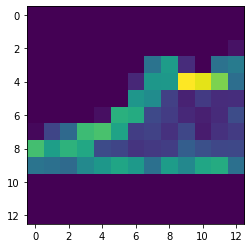

In [29]:
len(pred)  # 7 个层
pred[0].shape   # (1, 26, 26, 64)
plt.imshow(pred[1][0, :, :,1])    #一个模糊的鞋面

In [ ]:
# 准备数据，--构建数据， 训练数据， 优化参数

https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-hourse-or-human.zip

In [35]:
# !wget --no-check-certificate \
# https://storage.googleapis.com/laurencemoroney-blog.appspot.com \
#     /validation-hourse-or-human.zip -O /tmp/hourse-or-human.zip

#  zsh:1: command not found: wget

# https://blog.csdn.net/weixin_40046130/article/details/106280208
    

# 下载 文件链接
# 数据知乎：https://zhuanlan.zhihu.com/p/65241451
# https://link.zhihu.com/?target=https%3A//storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip


    
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip


zsh:1: command not found: wget


In [ ]:
!!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com \
    /validation-hourse-or-human.zip -O /tmp/validatiob-hourse-or-human.zip